## Question 8

In [3]:
# read in the data
data = read.csv("framingham.csv")
# get the number of variables & print
numVars = length(data[0,])
printStr = sprintf("Number of variables in the data set: %d", numVars)
printStr

[1] "Number of variables in the data set: 16"

## Question 9

In [4]:
types = str(data)

'data.frame':	4240 obs. of  16 variables:
 $ male           : int  1 0 1 0 0 0 0 0 1 1 ...
 $ age            : int  39 46 48 61 46 43 63 45 52 43 ...
 $ education      : int  4 2 1 3 3 2 1 2 1 1 ...
 $ currentSmoker  : int  0 0 1 1 1 0 0 1 0 1 ...
 $ cigsPerDay     : int  0 0 20 30 23 0 0 20 0 30 ...
 $ BPMeds         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ prevalentStroke: int  0 0 0 0 0 0 0 0 0 0 ...
 $ prevalentHyp   : int  0 0 0 1 0 1 0 0 1 1 ...
 $ diabetes       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ totChol        : int  195 250 245 225 285 228 205 313 260 225 ...
 $ sysBP          : num  106 121 128 150 130 ...
 $ diaBP          : num  70 81 80 95 84 110 71 71 89 107 ...
 $ BMI            : num  27 28.7 25.3 28.6 23.1 ...
 $ heartRate      : int  80 95 75 65 85 77 60 79 76 93 ...
 $ glucose        : int  77 76 70 103 85 99 85 78 79 88 ...
 $ TenYearCHD     : int  0 0 0 1 0 0 1 0 0 0 ...


Systolic BP is of type: num

## Question 10

In [5]:
summary(data)

      male             age          education     currentSmoker   
 Min.   :0.0000   Min.   :32.00   Min.   :1.000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:42.00   1st Qu.:1.000   1st Qu.:0.0000  
 Median :0.0000   Median :49.00   Median :2.000   Median :0.0000  
 Mean   :0.4292   Mean   :49.58   Mean   :1.979   Mean   :0.4941  
 3rd Qu.:1.0000   3rd Qu.:56.00   3rd Qu.:3.000   3rd Qu.:1.0000  
 Max.   :1.0000   Max.   :70.00   Max.   :4.000   Max.   :1.0000  
                                  NA's   :105                     
   cigsPerDay         BPMeds        prevalentStroke     prevalentHyp   
 Min.   : 0.000   Min.   :0.00000   Min.   :0.000000   Min.   :0.0000  
 1st Qu.: 0.000   1st Qu.:0.00000   1st Qu.:0.000000   1st Qu.:0.0000  
 Median : 0.000   Median :0.00000   Median :0.000000   Median :0.0000  
 Mean   : 9.006   Mean   :0.02962   Mean   :0.005896   Mean   :0.3106  
 3rd Qu.:20.000   3rd Qu.:0.00000   3rd Qu.:0.000000   3rd Qu.:1.0000  
 Max.   :70.000   Max.   :1.0000

The features with **missing** values are:

education, cigsPerDay, BPMeds, totChol, BMI, heartRate, glucose


The features that are **binary** categorical data types are:

male, currentSmoker, BPMeds, prevalentStroke, prevalentHyp, diabetes, TenYearCHD

## Question 11 & 12

In [9]:
summSex = summary(data$male)
print(sprintf("Percent Male: %%%.3f", summSex['Mean'] * 100))

print(sprintf("Percent Female: %%%.3f", 1 - summSex['Mean'] * 100))

summNA = summary(data$totChol)
summNA['NA\'s']

dataNoNA = data[complete.cases(data[ , "totChol"]),]
numHighChol = nrow(dataNoNA[dataNoNA[,"totChol"] >= 300,])
totalObs = nrow(data)
percentage = numHighChol / totalObs * 100
sprintf("Percentage of participants with total cholesterol of at least 300: %.3f%%", percentage)

subFemale = subset(data, data['male'] == 0)
bothFemaleChol = nrow(subset(subFemale, subFemale$totChol >= 300))
sprintf("Percentage of participants with a total cholesterol of at least 300 AND female: %.3f%%", bothFemaleChol / nrow(data) * 100)

subDiabetes = subset(data, data['diabetes'] == 1)
sprintf("Percentage of participatnts with diabetes: %.3f%%", nrow(subDiabetes) / nrow(data) * 100)

subMale =  subset(data, data['male'] == 1)
subMaleAndBMI = subset(subMale, subMale$BMI >= 30.0)
sprintf("Percentage of males with a BMI of at least 30.0: %.3f%%", nrow(subMaleAndBMI) / nrow(subMale) * 100)

subDib =  subset(data, data['diabetes'] == 1)
subDibAndBMI = subset(subDib, subDib$BMI >= 30.0)
sprintf("Percentage of participants with diabetes AND a BMI of at least 30.0: %.3f%%", nrow(subDibAndBMI) / nrow(data) * 100)

[1] "Percent Male: %42.925"
[1] "Percent Female: %-41.925"


NA's 
  50 

[1] "Percentage of participants with total cholesterol of at least 300: 8.137%"

[1] "Percentage of participants with a total cholesterol of at least 300 AND female: 5.566%"

[1] "Percentage of participatnts with diabetes: 2.571%"

[1] "Percentage of males with a BMI of at least 30.0: 11.923%"

[1] "Percentage of participants with diabetes AND a BMI of at least 30.0: 0.684%"

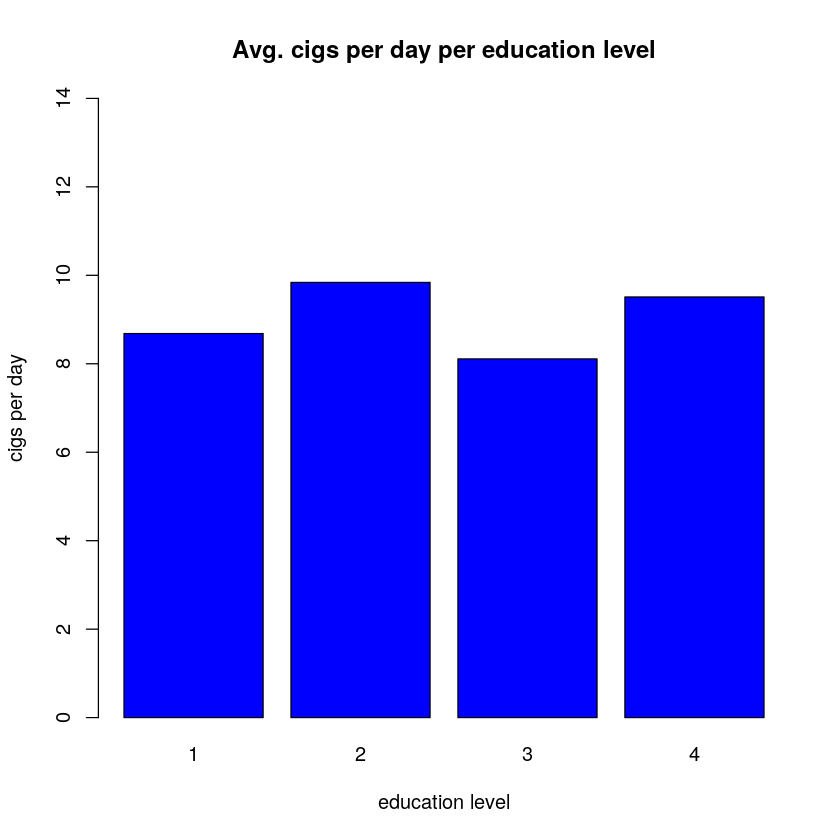

In [10]:
# dop Na from the cigs per day data
dropNaSmoke = data[complete.cases(data[, "cigsPerDay"]),]
dropNaBoth = dropNaSmoke[complete.cases(data[, "education"]),]

# get the cigs per day mean
getEduCigMean = function(educationValue){
    return(mean(subset(dropNaSmoke, dropNaSmoke$education == educationValue)$cigsPerDay))
}

# get the means for each category of education
cigSums = c(getEduCigMean(1), getEduCigMean(2), getEduCigMean(3), getEduCigMean(4))
subSumNames = c("1", "2", "3", "4")
names(cigSums) = subSumNames

# make the plot
barplot(cigSums, main="Avg. cigs per day per education level", xlab ="education level", ylab="cigs per day", ylim = c(0, 14), col="blue")

## Question 13

In [11]:
# create the table
table = table(data$TenYearCHD, data$currentSmoker)
round(prop.table(table), 5) * 100

   
         0      1
  0 43.255 41.557
  1  7.335  7.854

We can infer that it is much more likely to not have CHD than it is to have CHD, regardless of if you are a smoker or not. This means that we cannot form a connection between smoking and your chance of developing CHD after ten years.

## Question 14

In [30]:
# function to get the relative probability
getProbWithCHD = function(subData){
    return(nrow(subset(subData, subData['TenYearCHD'] == 1)) / nrow(subData) * 100)
}

# get relative probability of diabetes and TenYearCHD
diabetesSub = subset(data, data['diabetes'] == 1)
diabetesProb = getProbWithCHD(diabetesSub)

# get relative probability of cigsPerDay and TenYearCHD
cigsSub = subset(data, data['cigsPerDay'] >= 5)
cigsProb = getProbWithCHD(cigsSub)

# get relative probability of tptChol and TenYearCHD
totCholSub = subset(data, data['totChol'] >= 230)
totCholProb = getProbWithCHD(totCholSub)

# get relative probability of sysBP and TenYearCHD
sysBP = subset(data, data['sysBP'] >= 135)
sysBPProb = getProbWithCHD(sysBP)

# get relative probability of diaBP and TenYearCHD
diaBP = subset(data, data['diaBP'] >= 84)
diaBPProb = getProbWithCHD(diaBP)

# get relative probability of heartRate and TenYearCHD
heartRate = subset(data, data['heartRate'] >= 84)
heartRateProb = getProbWithCHD(heartRate)

# put the relative probabilities in a list
relativeProbabilities = c(diabetesProb, cigsProb, totCholProb, sysBPProb, diaBPProb, heartRateProb)
# give em names
probNames = c("Relative Diabetes Probability: ", "Relative Cigs Daily Probability: ", "Relative Total Cholesterol Probability: ", 
              "Relative Sys BP Probility: ", "Relative Dia BP Probability: ", "Relative Heart Rate Probability: ")

# print them out
for(i in 1:length(probNames)){
    temp = sprintf("%s %%%.3f", probNames[i], relativeProbabilities[i])
    print(temp)
}

# print the general probability of having CHD
sprintf("Pure probability of having CHD in ten years: %%%.3f", 100 * summary(data$TenYearCHD)['Mean'])

[1] "Relative Diabetes Probability:  %36.697"
[1] "Relative Cigs Daily Probability:  %16.613"
[1] "Relative Total Cholesterol Probability:  %17.193"
[1] "Relative Sys BP Probility:  %23.256"
[1] "Relative Dia BP Probability:  %19.664"
[1] "Relative Heart Rate Probability:  %16.243"


[1] "Pure probability of having CHD in ten years: %15.189"

The first output above is from the calculation of either P(TenYearCHD | variableValue == observation) if the variable is discrete, or P(TenYearCHD | variableValue >= observation) if the variable is continuous.

The second output is the general probability of having developed TenYearCHD, from all observations in the data set. Given the probability is strictly higher for every single variable value of the patient's, it would be a fair assessment to expect them to develop CHD in the next ten years.

## Question 15

No, the beta distribution would not be appropriate, regardless of the parameters, because it is meant for continuous data, and not discrete. In this case, ours would be discrete, as the only possible outcomes are 0 for no CHD after ten years, or 1 for CHD being present after ten years.